# Analysis Notebook
* Name: Kalie Knecht
* SID: 3035325996
* Email: kalie@berkeley.edu

## Setup

In [2]:
import numpy as np
import pandas as pd
from zipfile import ZipFile

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)
import reverse_geocoder as rg

### Load and View Data

In [3]:
# extract csvs from zip file
zipObj=ZipFile('../data/Dataset_A.zip', 'r')
zipObj.extractall(path='../data/')

In [4]:
# read in csv
daily_global_weather = pd.read_csv('../data/Dataset A/daily_global_weather_2020.csv')
us_air_quality = pd.read_csv('../data/Dataset A/us_air_quality_measures.csv')
greenhouse_gas_type = pd.read_csv('../data/Dataset A/us_greenhouse_gas_emission_direct_emitter_gas_type.csv')
greenhouse_gas_facility = pd.read_csv('../data/Dataset A/us_greenhouse_gas_emissions_direct_emitter_facilities.csv')

/Users/kalie/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
daily_global_weather.head(5)

,Unnamed: 0,Station,Date,TAVG,Latitude,Longitude,Elevation,PRCP
0,0,AE000041196,2020-01-01,211.0,25.333,55.5170,34.0,0.0
1,1,AEM00041194,2020-01-01,217.0,25.255,55.3640,10.4,0.0
2,2,AFM00040938,2020-01-01,54.0,34.210,62.2280,977.2,23.0
3,3,AG000060611,2020-01-01,71.0,28.050,9.6331,561.0,10.0
4,4,AGE00147708,2020-01-01,99.0,36.720,4.0500,222.0,0.0


In [6]:
us_air_quality.head(5)

,MeasureId,MeasureName,MeasureType,StratificationLevel,StateFips,StateName,CountyFips,CountyName,ReportYear,Value,Unit,UnitName,DataOrigin,MonitorOnly
0,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1027,Clay,1999,33.0,No Units,No Units,Monitor Only,1
1,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1051,Elmore,1999,5.0,No Units,No Units,Monitor Only,1
2,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1073,Jefferson,1999,39.0,No Units,No Units,Monitor Only,1
3,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1079,Lawrence,1999,28.0,No Units,No Units,Monitor Only,1
4,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1089,Madison,1999,31.0,No Units,No Units,Monitor Only,1


In [7]:
greenhouse_gas_type.head(5)

,V_GHG_EMITTER_GAS.ADDRESS1,V_GHG_EMITTER_GAS.ADDRESS2,V_GHG_EMITTER_GAS.CITY,V_GHG_EMITTER_GAS.CO2E_EMISSION,V_GHG_EMITTER_GAS.COUNTY,V_GHG_EMITTER_GAS.FACILITY_ID,V_GHG_EMITTER_GAS.GAS_CODE,V_GHG_EMITTER_GAS.GAS_NAME,V_GHG_EMITTER_GAS.LATITUDE,V_GHG_EMITTER_GAS.LONGITUDE,V_GHG_EMITTER_GAS.STATE,V_GHG_EMITTER_GAS.STATE_NAME,V_GHG_EMITTER_GAS.YEAR,V_GHG_EMITTER_GAS.ZIP,V_GHG_EMITTER_GAS.FACILITY_NAME,V_GHG_EMITTER_GAS.COUNTY_FIPS
0,1919 S. BROADWAY,NaN,GREEN BAY,58024.000,BROWN COUNTY,1000589,BIOCO2,Biogenic CO2,44.492500,-88.032300,WI,WISCONSIN,2017,54304,GEORGIA-PACIFIC CONSUMER OPERATIONS LLC,55009.0
1,850 12TH AVE,NaN,NEW YORK,134.500,New York,1000766,CH4,Methane,40.771100,-73.991100,NY,NEW YORK,2018,10019,59th Street,36061.0
2,3379 HWY 482,NaN,Noble,6.854,SABINE,1009343,N2O,Nitrous Oxide,31.621528,-93.724774,LA,LOUISIANA,2012,71462,Baker Road Treater,22085.0
3,1012 BEAUCHAMP ST,NaN,GREENVILLE,53562.000,WASHINGTON COUNTY,1003557,CH4,Methane,33.392476,-91.017584,MS,MISSISSIPPI,2017,38701,TEXAS GAS TRANSMISSION - GREENVILLE STATION,28151.0
4,487 CORN CREEK ROAD,NaN,BEDFORD,7635064.700,Trimble,1006542,CO2,Carbon Dioxide,38.584700,-85.411700,KY,KENTUCKY,2018,40006,Trimble County,21223.0


In [8]:
greenhouse_gas_facility.head(5)

,V_GHG_EMITTER_FACILITIES.ADDRESS1,V_GHG_EMITTER_FACILITIES.ADDRESS2,V_GHG_EMITTER_FACILITIES.CEMS_USED,V_GHG_EMITTER_FACILITIES.CITY,V_GHG_EMITTER_FACILITIES.COUNTY,V_GHG_EMITTER_FACILITIES.COUNTY_FIPS,V_GHG_EMITTER_FACILITIES.FACILITY_ID,V_GHG_EMITTER_FACILITIES.LATITUDE,V_GHG_EMITTER_FACILITIES.LONGITUDE,V_GHG_EMITTER_FACILITIES.PRIMARY_NAICS_CODE,...,V_GHG_EMITTER_FACILITIES.STATE_NAME,V_GHG_EMITTER_FACILITIES.YEAR,V_GHG_EMITTER_FACILITIES.ZIP,V_GHG_EMITTER_FACILITIES.FACILITY_NAME,V_GHG_EMITTER_FACILITIES.SECONDARY_NAICS_CODE,V_GHG_EMITTER_FACILITIES.ADDITIONAL_NAICS_CODES,V_GHG_EMITTER_FACILITIES.COGENERATION_UNIT_EMISS_IND,V_GHG_EMITTER_FACILITIES.EPA_VERIFIED,V_GHG_EMITTER_FACILITIES.PARENT_COMPANY,V_GHG_EMITTER_FACILITIES.PLANT_CODE_INDICATOR
0,301 Commerce Dr. Suite 3701,NaN,NaN,Fort Worth,NaN,NaN,1008536.0,35.533760,-97.529760,211111.0,...,TEXAS,2012.0,76102.0,TEP Barnett USA LLC 415 - Strawn Basin,NaN,NaN,N,NaN,CHESAPEAKE ENERGY CORP (100%),NaN
1,449 Shell E&P Court,NaN,NaN,Gibson,TERREBONNE,22109.0,1005071.0,29.628790,-90.917680,211112.0,...,LOUISIANA,2011.0,70358.0,North Terrebonne Gas Plant,NaN,NaN,N,NaN,ENTERPRISE GAS PROCESSING LLC (64.19%); DCP M...,NaN
2,5494 MALONE ROAD,NaN,NaN,MEMPHIS,SHELBY COUNTY,47157.0,1002466.0,34.999213,-89.906724,562212.0,...,TENNESSEE,2017.0,38116.0,SOUTH SHELBY LANDFILL,NaN,NaN,N,NaN,REPUBLIC SERVICES INC (100%),N
3,1601 WEEDON ISLAND DRIVE,NaN,NaN,SAINT PETERSBURG,Pinellas,12103.0,1001489.0,27.861300,-82.601200,221112.0,...,FLORIDA,2015.0,33702.0,P L Bartow Power Plant,NaN,NaN,N,NaN,DUKE ENERGY CORP (100%),Y
4,NaN,NaN,NaN,Rhome,WISE COUNTY,48497.0,1007509.0,33.052600,-97.411400,211112.0,...,TEXAS,2015.0,76078.0,Ross Compressor Station,NaN,NaN,N,NaN,SWG PIPELINE LLC (100%),Y


## Data Sampling and Collection
### How were the data collected?

* The `daily_global_weather` dataframe is measured by weather stations in the Global Historical Climatology Network (GHCN) for January to October 2020. According to the GHCN webiste: "GHCN is an integrated database of climate summaries from land surface stations across the globe that have been subjected to a common suite of quality assurance reviews. The data are obtained from more than 20 sources. Some data are more than 175 years old while others are less than an hour old. GHCN is the official archived dataset, and it serves as a replacement product for older NCEI-maintained datasets that are designated for daily temporal resolution (i.e., DSI 3200, DSI 3201, DSI 3202, DSI 3205, DSI 3206, DSI 3208, DSI 3210, etc.)." The raw data has been altered to include only the average temperature and precipitation measurments from stations that have both measurements. 

* The `greenhouse_gas_type` and `greenhouse_gas_facility` dataframes are reported by the Environmental Protection Agency (EPA) through their Greenhouse Gas Reporting system. This data is reported from large GHG emissions sources, fuel, and industrial gas suppliers, and CO2 injection sites in the United States. Only sources that in general emit 25,000 meric ton
    * The `greenhouse_gas_type` dataframe is
    * The `greenhouse_gas_facility` dataframe is
* The `us_air_quality` dataframe is reported by the EPA's Air Quality System (AQS) that measures air quality on a county level from approximately 4000 monitoring stations around the country.


### Was there any potential bias introduced in the sampling process?
* The `daily_global_weather` has 8,514,264 entries, but appears to not have daily entries for each station. The number of entries by station varies from 1 to 296, out of 365.25 days in the year. Additionally, some countries are represented better than others. Out of the 4970 stations we are using data from, the US has 1070 stations, Canada has 890 stations, and Russia has 609 stations. This means that over half of the data is generated from stations in just three countries. The countries after these three with the most monitoring stations are China, with 216 monitoring stations, and Japan, with 142 monitoring stations. Therea are also only stations in 180 countries, when there are 195 countries in the world. This means that there are 15 countries which are not represented at all by the dataset. There are 40 countries which only have 1 station, and 56 countries which have 2 or less monitoring stations. This overrepresentation of some countries relative to others could be a source of bias.

In [9]:
daily_global_weather.size

8514264

In [10]:
daily_global_weather['Station'].value_counts()

USS0013M06S    296
USS0011J70S    296
USS0021B20S    296
CA006133055    296
USS0011C02S    296
CA004013660    296
CA008202000    296
USS0007K11S    296
CA001106CL2    296
CA001102912    296
USS0014E01S    296
USS0013C44S    296
USS0006K12S    296
CA001048898    296
USS0011J12S    296
USS0019L43S    296
CA004015440    296
USS0009F18S    296
USS0047O01S    296
USS0013A15S    296
USS0007M36S    296
USS0010D35S    296
USS0006K04S    296
USW00014739    296
USS0011K05S    296
USS0013C13S    296
USS0014C13S    296
CA001054500    296
USS0011E39S    296
USS0014F17S    296
              ... 
IDM00097230      1
KZ000035532      1
EG000062417      1
IDM00096645      1
KZ000035358      1
JOM00040296      1
GV000001809      1
LYM00062200      1
NIM00065271      1
UZM00038683      1
GG000037395      1
UZM00038262      1
IDM00097430      1
KZ000029906      1
IDM00096109      1
PA000086033      1
KZ000035563      1
KZ000038201      1
KZ000036397      1
PP000092014      1
IDM00096087      1
AYM00089251 

In [11]:
# Check countries represented by data

# organize data by stations
stations = daily_global_weather.groupby(['Station']).agg('min')[['Latitude','Longitude']]
stations['Lat , Lon']=list(zip(stations.Latitude,stations.Longitude))
stations.reset_index(inplace=True)

# extract coordinates of each station to a list of tuples
#coords = list(stations.itertuples(index=False,name=None))
coords = stations['Lat , Lon'].to_list()

# use reverese_geocoder to return info about each lat and lon
results = rg.search(coords)
# put results into dataframe
results_df=pd.DataFrame(results)

# Add results to station dataframe
stations = stations.join(results_df) 
stations.head(5)

Loading formatted geocoded file...


,Station,Latitude,Longitude,"Lat , Lon",lat,lon,name,admin1,admin2,cc
0,AE000041196,25.333,55.517,"(25.333, 55.517)",25.33737,55.41206,Sharjah,Ash Shariqah,,AE
1,AEM00041194,25.255,55.364,"(25.255, 55.364)",25.33737,55.41206,Sharjah,Ash Shariqah,,AE
2,AEM00041217,24.433,54.651,"(24.433000000000003, 54.651)",24.46667,54.36667,Abu Dhabi,Abu Dhabi,,AE
3,AEM00041218,24.262,55.609,"(24.262, 55.609)",24.19167,55.76056,Al Ain,Abu Dhabi,,AE
4,AFM00040938,34.210,62.228,"(34.21, 62.228)",34.21223,62.21235,Guzarah,Herat,,AF


In [12]:
# Check number of stations in each country
stations['cc'].value_counts().head(5)

US    1070
CA     890
RU     609
CN     216
JP     142
Name: cc, dtype: int64

In [13]:
# Check number of stations in each country
only_one=stations['cc'].value_counts() == 1
two_or_less=stations['cc'].value_counts() <= 2
three_or_less=stations['cc'].value_counts() <= 3
four_or_less=stations['cc'].value_counts() <= 4

print('0 stations: ',15,
      '\n1 station: ',only_one.sum(),
      '\n1 or less stations: ',15+only_one.sum(),
      '\n2 or less stations: ',two_or_less.sum(),
      '\n3 or less stations: ',three_or_less.sum(),
      '\n4 or less stations: ',four_or_less.sum())

0 stations:  15 
1 station:  40 
1 or less stations:  55 
2 or less stations:  56 
3 or less stations:  68 
4 or less stations:  81


In [14]:
greenhouse_gas_type.head(4)

,V_GHG_EMITTER_GAS.ADDRESS1,V_GHG_EMITTER_GAS.ADDRESS2,V_GHG_EMITTER_GAS.CITY,V_GHG_EMITTER_GAS.CO2E_EMISSION,V_GHG_EMITTER_GAS.COUNTY,V_GHG_EMITTER_GAS.FACILITY_ID,V_GHG_EMITTER_GAS.GAS_CODE,V_GHG_EMITTER_GAS.GAS_NAME,V_GHG_EMITTER_GAS.LATITUDE,V_GHG_EMITTER_GAS.LONGITUDE,V_GHG_EMITTER_GAS.STATE,V_GHG_EMITTER_GAS.STATE_NAME,V_GHG_EMITTER_GAS.YEAR,V_GHG_EMITTER_GAS.ZIP,V_GHG_EMITTER_GAS.FACILITY_NAME,V_GHG_EMITTER_GAS.COUNTY_FIPS
0,1919 S. BROADWAY,NaN,GREEN BAY,58024.000,BROWN COUNTY,1000589,BIOCO2,Biogenic CO2,44.492500,-88.032300,WI,WISCONSIN,2017,54304,GEORGIA-PACIFIC CONSUMER OPERATIONS LLC,55009.0
1,850 12TH AVE,NaN,NEW YORK,134.500,New York,1000766,CH4,Methane,40.771100,-73.991100,NY,NEW YORK,2018,10019,59th Street,36061.0
2,3379 HWY 482,NaN,Noble,6.854,SABINE,1009343,N2O,Nitrous Oxide,31.621528,-93.724774,LA,LOUISIANA,2012,71462,Baker Road Treater,22085.0
3,1012 BEAUCHAMP ST,NaN,GREENVILLE,53562.000,WASHINGTON COUNTY,1003557,CH4,Methane,33.392476,-91.017584,MS,MISSISSIPPI,2017,38701,TEXAS GAS TRANSMISSION - GREENVILLE STATION,28151.0


In [15]:
greenhouse_gas_type.groupby(['V_GHG_EMITTER_GAS.GAS_CODE'])[['V_GHG_EMITTER_GAS.CO2E_EMISSION']].agg(sum)

,V_GHG_EMITTER_GAS.CO2E_EMISSION
V_GHG_EMITTER_GAS.GAS_CODE,
BIOCO2,1.518386e+09
CH4,2.156935e+09
CO2,2.826026e+10
HFC,8.194868e+07
HFE,4.355320e+05
N2O,2.738154e+08
NF3,7.896770e+06
Other,4.707912e+05
Other_Full,1.178413e+07


In [16]:
greenhouse_gas_type.groupby(['V_GHG_EMITTER_GAS.YEAR','V_GHG_EMITTER_GAS.GAS_CODE',])[['V_GHG_EMITTER_GAS.CO2E_EMISSION']].agg(sum)

V_GHG_EMITTER_GAS.CO2E_EMISSION
V_GHG_EMITTER_GAS.YEAR V_GHG_EMITTER_GAS.GAS_CODE                                 
2010                   BIOCO2                                         1.538681e+08
                       CH4                                            1.080399e+08
                       CO2                                            3.049345e+09
                       HFC                                            8.034751e+06
                       N2O                                            2.929191e+07
                       PFC                                            1.859915e+06
2011                   BIOCO2                                         1.564392e+08
                       CH4                                            2.353260e+08
                       CO2                                            3.018171e+09
                       HFC                                            1.372832e+07
                       HFE                                            1.688357e+04
                       N2O                                            3.404701e+07
                       NF3                                            1.155088e+06
                       Other                                          4.048567e+04
                       Other_Full                                     1.484069e+06
                       PFC                                            8.302558e+06
                       SF6                                            6.089911e+06
                       Very_Short                                     2.262896e+02
2012                   BIOCO2                                         1.592621e+08
                       CH4                                            2.291970e+08
                       CO2                                            2.886201e+09
                       HFC                                            1.076541e+07
                       HFE                                            1.360390e+04
                       N2O                                            2.788525e+07
                       NF3                                            1.097281e+06
                       Other                                          3.855080e+04
                       Other_Full                                     1.529056e+06
                       PFC                                            7.513708e+06
                       SF6                                            5.023157e+06
                       Very_Short                                     1.650766e+02
...                                                                            ...
2017                   NF3                                            9.827254e+05
                       Other                                          5.926270e+04
                       Other_Full                                     1.005150e+06
                       PFC                                            5.074671e+06
                       SF6                                            4.079198e+06
                       Very_Short                                     4.728791e+03
2018                   BIOCO2                                         1.445725e+08
                       CH4                                            2.288205e+08
                       CO2                                            2.715329e+09
                       HFC                                            5.701639e+06
                       HFE                                            4.439831e+04
                       N2O                                            2.865956e+07
                       NF3                                            7.186280e+05
                       Other                                          9.625780e+04
                       Other_Full                                     1.052462e+06
                       PFC                                         

In [17]:
greenhouse_gas_facility.head(4)

,V_GHG_EMITTER_FACILITIES.ADDRESS1,V_GHG_EMITTER_FACILITIES.ADDRESS2,V_GHG_EMITTER_FACILITIES.CEMS_USED,V_GHG_EMITTER_FACILITIES.CITY,V_GHG_EMITTER_FACILITIES.COUNTY,V_GHG_EMITTER_FACILITIES.COUNTY_FIPS,V_GHG_EMITTER_FACILITIES.FACILITY_ID,V_GHG_EMITTER_FACILITIES.LATITUDE,V_GHG_EMITTER_FACILITIES.LONGITUDE,V_GHG_EMITTER_FACILITIES.PRIMARY_NAICS_CODE,...,V_GHG_EMITTER_FACILITIES.STATE_NAME,V_GHG_EMITTER_FACILITIES.YEAR,V_GHG_EMITTER_FACILITIES.ZIP,V_GHG_EMITTER_FACILITIES.FACILITY_NAME,V_GHG_EMITTER_FACILITIES.SECONDARY_NAICS_CODE,V_GHG_EMITTER_FACILITIES.ADDITIONAL_NAICS_CODES,V_GHG_EMITTER_FACILITIES.COGENERATION_UNIT_EMISS_IND,V_GHG_EMITTER_FACILITIES.EPA_VERIFIED,V_GHG_EMITTER_FACILITIES.PARENT_COMPANY,V_GHG_EMITTER_FACILITIES.PLANT_CODE_INDICATOR
0,301 Commerce Dr. Suite 3701,NaN,NaN,Fort Worth,NaN,NaN,1008536.0,35.533760,-97.529760,211111.0,...,TEXAS,2012.0,76102.0,TEP Barnett USA LLC 415 - Strawn Basin,NaN,NaN,N,NaN,CHESAPEAKE ENERGY CORP (100%),NaN
1,449 Shell E&P Court,NaN,NaN,Gibson,TERREBONNE,22109.0,1005071.0,29.628790,-90.917680,211112.0,...,LOUISIANA,2011.0,70358.0,North Terrebonne Gas Plant,NaN,NaN,N,NaN,ENTERPRISE GAS PROCESSING LLC (64.19%); DCP M...,NaN
2,5494 MALONE ROAD,NaN,NaN,MEMPHIS,SHELBY COUNTY,47157.0,1002466.0,34.999213,-89.906724,562212.0,...,TENNESSEE,2017.0,38116.0,SOUTH SHELBY LANDFILL,NaN,NaN,N,NaN,REPUBLIC SERVICES INC (100%),N
3,1601 WEEDON ISLAND DRIVE,NaN,NaN,SAINT PETERSBURG,Pinellas,12103.0,1001489.0,27.861300,-82.601200,221112.0,...,FLORIDA,2015.0,33702.0,P L Bartow Power Plant,NaN,NaN,N,NaN,DUKE ENERGY CORP (100%),Y


## Data Cleaning
* What type of data are you currently exploring?
* What is the granularity of the data?
* What does the distribution of the data look like? Are there any outliers? Are there any missing or invalid entries?
    * greenhouse_gas_facility
        * missing values
            * address line 2
            * cems used
            * facility county + related values
            * a ton more

In [21]:
daily_global_weather.head(5)

,Unnamed: 0,Station,Date,TAVG,Latitude,Longitude,Elevation,PRCP
0,0,AE000041196,2020-01-01,211.0,25.333,55.5170,34.0,0.0
1,1,AEM00041194,2020-01-01,217.0,25.255,55.3640,10.4,0.0
2,2,AFM00040938,2020-01-01,54.0,34.210,62.2280,977.2,23.0
3,3,AG000060611,2020-01-01,71.0,28.050,9.6331,561.0,10.0
4,4,AGE00147708,2020-01-01,99.0,36.720,4.0500,222.0,0.0


In [33]:
# daily_global_weather To do
# check that elevation, lat, long same for sttation each time
# figure out units

In [63]:
daily_global_weather['TAVG'].min()

-761.0

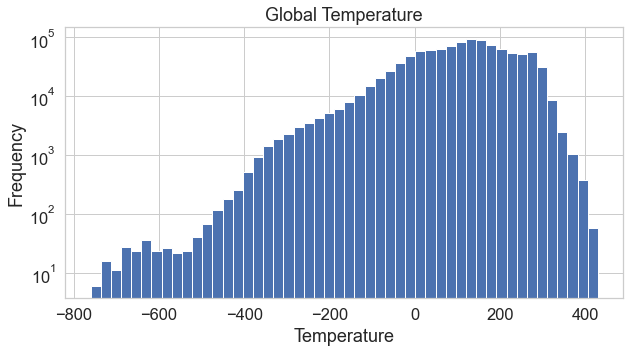

In [67]:
plt.figure(figsize=(10,5))
plt.hist(daily_global_weather['TAVG'],bins=50,range=(-760,430),log=True)
plt.title('Global Temperature Logs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

In [97]:
daily_ave_weather = daily_global_weather.groupby('Date').agg('mean')
#daily_ave_weather.reset_index(inplace=True)

In [98]:
# Data cleaning - convert date to datetime
#daily_ave_weather['Date']=pd.to_datetime(daily_ave_weather['Date'])

KeyError: 'Date'

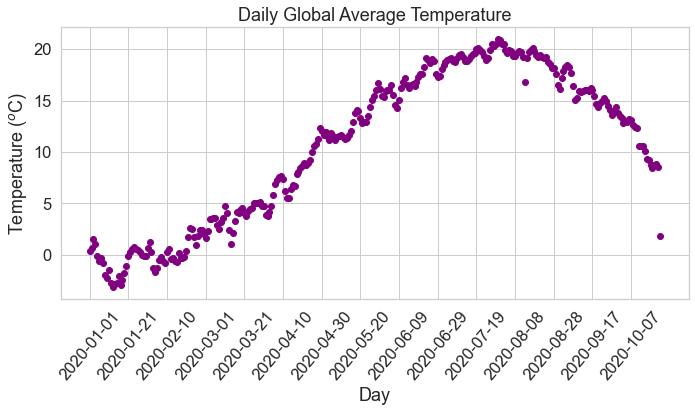

In [134]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 5))

# Add x-axis and y-axis
# temp in 10s of Celsius
ax.scatter(daily_ave_weather.index.values,
        daily_ave_weather['TAVG']/10,
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Day",
       ylabel="Temperature ($^o$C)",
       title="Daily Global Average Temperature")
plt.tight_layout()
plt.xticks(np.arange(0,300,20),rotation=50)
plt.savefig('../figures/DailyAveTemp.png',bbox_inches = 'tight',pad_inches=1)
plt.show()


In [26]:
daily_global_weather['TAVG'].value_counts()

 128.0    5075
 138.0    4805
 143.0    4635
 133.0    4611
 148.0    4462
 153.0    4243
 158.0    4177
 156.0    4165
 147.0    4155
 123.0    4118
 118.0    4106
 122.0    4105
 144.0    4094
 139.0    4090
 163.0    4034
 111.0    4011
 154.0    4003
 117.0    3982
 168.0    3962
 136.0    3933
 106.0    3926
 149.0    3920
 134.0    3897
 166.0    3878
 113.0    3864
 173.0    3850
 146.0    3827
 119.0    3824
 142.0    3823
 159.0    3822
          ... 
-626.0       1
-625.0       1
-617.0       1
-616.0       1
-610.0       1
-681.0       1
-609.0       1
-603.0       1
-602.0       1
-601.0       1
-600.0       1
-597.0       1
-637.0       1
-642.0       1
-643.0       1
-644.0       1
-646.0       1
-647.0       1
-650.0       1
-655.0       1
-657.0       1
-659.0       1
-661.0       1
-664.0       1
-667.0       1
-673.0       1
-674.0       1
-675.0       1
-680.0       1
-511.0       1
Name: TAVG, Length: 1076, dtype: int64

## Exploratory Data Analysis
* Is there any correlation between the variables you are interested in exploring?
* How would you cleanly and accurately visualize the relationship among variables?

In [18]:
# note to self - save all figures to /figures notebook

## Data Modeling and Inferences
* Please note that the following datasets have a data modeling requirement, i.e. you need to utilize at least 1 machine learning model we teach in this class in your project (my dataset is included in list)
* Here are a few components your notebook must address:
    * What type of machine learning problem are you investigating?
    * What model do you plan on using and why?
    * Does your model require hyperparameter tuning? If so, how do you approach it?
    * How do you engineer the features for your model? What are the rationales behind selecting these features?
    * How do you perform cross validation on your model?
    * What loss metrics are you using to evaluate your model?
    * From a bias-variance tradeoff standpoint, how do you assess the performance of your model? How do you check if it is overfitting?
    * How would you improve your model based on the outcome?
* If you are choosing to pursue your research question from an inference angle, your notebook must demonstrate sufficient analysis and visualization to support your conclusion. We will not restrict you to the type of analysis as there are many different statistical techniques that may apply to your case. However, we also ask that you provide detailed justification for the techniques you choose and how it allows you make those inferences.